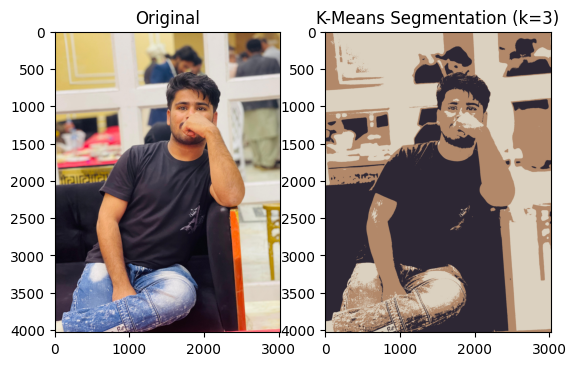

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/WhatsApp Image 2024-12-14 at 18.38.39_db08c80c.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to 2D array of pixels
pixel_vals = image_rgb.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Define criteria & apply kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # number of segments
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))

# Show results
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'K-Means Segmentation (k={k})')

plt.show()
